In [11]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['axes.labelsize'] = 18
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts}')

# plt.rc('font', family='Arial', size=12)
# plt.rc('axes', titlesize=16, labelsize=14, grid=True)
plt.rc('legend', fontsize=18, frameon=False)
plt.rc('xtick', labelsize=14, direction='in')
plt.rc('ytick', labelsize=14, direction='in')
plt.rc('figure', figsize=(6, 4), dpi=100)

In [12]:
# List of seed numbers you want to loop over
seed_numbers = range(0, 100)  # Adjust this range as needed

for seed in seed_numbers:
    if seed == 0:
        nkq_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_1.0/seed_{seed}__NKQ"
        with open(nkq_file_path, 'rb') as f:
            I_nkq_err_dict = pickle.load(f)
            I_nkq_values = np.array(list(I_nkq_err_dict.values()))[None, :]

        nmc_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_1.0/seed_{seed}__NMC"
        with open(nmc_file_path, 'rb') as f:
            I_nmc_err_dict = pickle.load(f)
            I_nmc_values = np.array(list(I_nmc_err_dict.values()))[None, :]
        
    else:
        nkq_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_1.0/seed_{seed}__NKQ"
        with open(nkq_file_path, 'rb') as f:
            I_nkq_err_dict = pickle.load(f)
            I_nkq_values = np.concatenate((np.array(list(I_nkq_err_dict.values()))[None, :], I_nkq_values), axis=0)
        
        nmc_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_1.0/seed_{seed}__NMC"
        with open(nmc_file_path, 'rb') as f:
            I_nmc_err_dict = pickle.load(f)
            I_nmc_values = np.concatenate((np.array(list(I_nmc_err_dict.values()))[None, :], I_nmc_values), axis=0)

# Convert lists to numpy arrays for easy computation
I_nkq_array = np.array(I_nkq_values)
I_nmc_array = np.array(I_nmc_values)

# Compute the median and standard deviation
I_nkq_median = np.median(I_nkq_array, axis=0)
I_nkq_q25 = np.percentile(I_nkq_array, 25, axis=0)
I_nkq_q75 = np.percentile(I_nkq_array, 75, axis=0)

I_nmc_median = np.median(I_nmc_array, axis=0)
I_nmc_q25 = np.percentile(I_nmc_array, 25, axis=0)
I_nmc_q75 = np.percentile(I_nmc_array, 75, axis=0)



In [13]:
# # List of seed numbers you want to loop over
# seed_numbers = range(0, 100)  # Adjust this range as needed

# for seed in seed_numbers:
#     if seed == 0:
#         nkq_ratio_half_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_0.5/seed_{seed}__NKQ"
#         with open(nkq_ratio_half_file_path, 'rb') as f:
#             I_nkq_ratio_half_err_dict = pickle.load(f)
#             I_nkq_ratio_half_values = np.array(list(I_nkq_ratio_half_err_dict.values()))[None, :]

#         nmc_ratio_half_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_0.5/seed_{seed}__NMC"
#         with open(nmc_ratio_half_file_path, 'rb') as f:
#             I_nmc_ratio_half_err_dict = pickle.load(f)
#             I_nmc_ratio_half_values = np.array(list(I_nmc_ratio_half_err_dict.values()))[None, :]
        
#     else:
#         nkq_ratio_half_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_0.5/seed_{seed}__NKQ"
#         with open(nkq_ratio_half_file_path, 'rb') as f:
#             I_nkq_ratio_half_err_dict = pickle.load(f)
#             I_nkq_ratio_half_values = np.concatenate((np.array(list(I_nkq_ratio_half_err_dict.values()))[None, :], I_nkq_ratio_half_values),axis=0)
        
#         nmc_ratio_half_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_0.5/seed_{seed}__NMC"
#         with open(nmc_ratio_half_file_path, 'rb') as f:
#             I_nmc_ratio_half_err_dict = pickle.load(f)
#             I_nmc_ratio_half_values = np.concatenate((np.array(list(I_nmc_ratio_half_err_dict.values()))[None, :], I_nmc_ratio_half_values),axis=0)

# # Convert lists to numpy arrays for easy computation
# I_nkq_ratio_half_array = np.array(I_nkq_ratio_half_values)
# I_nmc_ratio_half_array = np.array(I_nmc_ratio_half_values)

# # Compute the median and standard deviation
# I_nkq_ratio_half_median = np.median(I_nkq_ratio_half_array, axis=0)
# I_nkq_ratio_half_q25 = np.percentile(I_nkq_ratio_half_array, 25, axis=0)
# I_nkq_ratio_half_q75 = np.percentile(I_nkq_ratio_half_array, 75, axis=0)

# I_nmc_ratio_half_median = np.median(I_nmc_ratio_half_array, axis=0)
# I_nmc_ratio_half_q25 = np.percentile(I_nmc_ratio_half_array, 25, axis=0)
# I_nmc_ratio_half_q75 = np.percentile(I_nmc_ratio_half_array, 75, axis=0)



In [14]:
# List of seed numbers you want to loop over
seed_numbers = range(0, 100)  # Adjust this range as needed

for seed in seed_numbers:
    if seed == 0:
        nkq_ratio_two_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_2.0/seed_{seed}__NKQ"
        with open(nkq_ratio_two_file_path, 'rb') as f:
            I_nkq_ratio_two_err_dict = pickle.load(f)
            I_nkq_ratio_two_values = np.array(list(I_nkq_ratio_two_err_dict.values()))[None, :]

        nmc_ratio_two_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_2.0/seed_{seed}__NMC"
        with open(nmc_ratio_two_file_path, 'rb') as f:
            I_nmc_ratio_two_err_dict = pickle.load(f)
            I_nmc_ratio_two_values = np.array(list(I_nmc_ratio_two_err_dict.values()))[None, :]
        
    else:
        nkq_ratio_two_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_2.0/seed_{seed}__NKQ"
        with open(nkq_ratio_two_file_path, 'rb') as f:
            I_nkq_ratio_two_err_dict = pickle.load(f)
            I_nkq_ratio_two_values = np.concatenate((np.array(list(I_nkq_ratio_two_err_dict.values()))[None, :], I_nkq_ratio_two_values),axis=0)
        
        nmc_ratio_two_file_path = f"/home/zongchen/nest_bq/results/toy/dim_1__kernel_x_matern__kernel_theta_matern__N_T_ratio_2.0/seed_{seed}__NMC"
        with open(nmc_ratio_two_file_path, 'rb') as f:
            I_nmc_ratio_two_err_dict = pickle.load(f)
            I_nmc_ratio_two_values = np.concatenate((np.array(list(I_nmc_ratio_two_err_dict.values()))[None, :], I_nmc_ratio_two_values),axis=0)

# Convert lists to numpy arrays for easy computation
I_nkq_ratio_two_array = np.array(I_nkq_ratio_two_values)
I_nmc_ratio_two_array = np.array(I_nmc_ratio_two_values)

# Compute the median and standard deviation
I_nkq_ratio_two_median = np.median(I_nkq_ratio_two_array, axis=0)
I_nkq_ratio_two_q25 = np.percentile(I_nkq_ratio_two_array, 25, axis=0)
I_nkq_ratio_two_q75 = np.percentile(I_nkq_ratio_two_array, 75, axis=0)

I_nmc_ratio_two_median = np.median(I_nmc_ratio_two_array, axis=0)
I_nmc_ratio_two_q25 = np.percentile(I_nmc_ratio_two_array, 25, axis=0)
I_nmc_ratio_two_q75 = np.percentile(I_nmc_ratio_two_array, 75, axis=0)



In [24]:
I_nmc_ratio_two_array

array([0.2564997 , 0.04709505, 0.01105084, 0.0040183 , 0.0018666 ,
              nan,        nan,        nan,        nan,        nan,
              nan], dtype=float32)

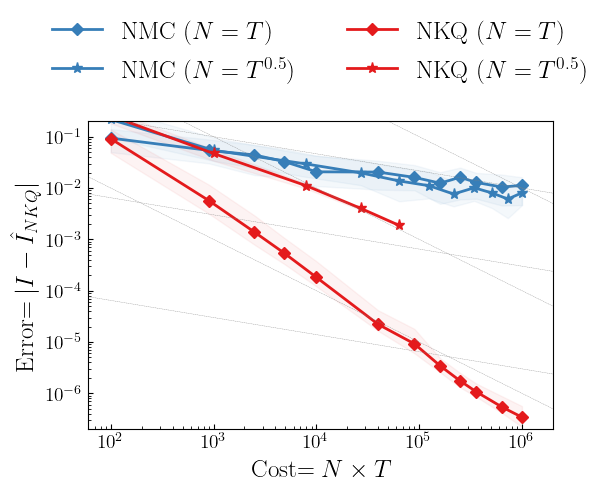

In [28]:
cmap = plt.get_cmap('Set1')
markersize = 6
linewidth = 2


# Extract the keys
keys = list(I_nkq_err_dict.keys())

# Extract the unique values from the first and second elements of the keys
N_array = np.array(sorted(set([k[0] for k in keys])), dtype=float)
cost_array = N_array ** 2

rescale_array_nkq_ratio_one = np.array([1.0, 1.0, 1.0, 1.0, 
                                        1.0, 1.0, 1.0, 1.0,
                                        1.0, 1.0, 1.0, 1.0])

rescale_array_nkq_ratio_two = np.array([1.0, 1.0, 1.0, 1.0, 
                                        1.0])

rescale_array_nmc_ratio_two = np.array([1.0, 1.0, 1.0, 1.0, 
                                        1.0, 1.0, 1.0, 1.0,
                                        1.0, 1.0, 1.0])


fig1 = plt.figure(figsize=(6, 4))
plt.grid(False)
plt.plot(cost_array, I_nmc_median, label=f'NMC ($N=T$)', color=cmap.colors[1], linewidth=linewidth, 
         marker='D', markersize=markersize)
plt.fill_between(cost_array, I_nmc_q25, I_nmc_q75, alpha=0.05, color=cmap.colors[1])

plt.plot(cost_array, I_nkq_median * rescale_array_nkq_ratio_one, label=f'NKQ ($N=T$)', 
         color=cmap.colors[0], linewidth=linewidth, marker='D', markersize=markersize)
plt.fill_between(cost_array, I_nkq_q25 * rescale_array_nkq_ratio_one, 
                 I_nkq_q75 * rescale_array_nkq_ratio_one, alpha=0.05, color=cmap.colors[0])

keys = list(I_nkq_ratio_two_err_dict.keys())
N_array_ratio_two = np.array([k[1] for k in keys], dtype=float)
T_array_ratio_two = np.array([k[0] for k in keys], dtype=float)
cost_array_ratio_two = N_array_ratio_two * T_array_ratio_two
cost_array_ratio_two[0] = 100

nkq_ratio_two_index = (1 - np.isnan(I_nkq_ratio_two_median)).sum()

plt.plot(cost_array_ratio_two, I_nmc_ratio_two_median * rescale_array_nmc_ratio_two * 2, label=rf'NMC ($N=T^{{0.5}}$)', 
         color=cmap.colors[1], linewidth=linewidth, marker='*', markersize=markersize + 2)
plt.fill_between(cost_array_ratio_two, I_nmc_ratio_two_q25 * rescale_array_nmc_ratio_two * 2, 
                 I_nmc_ratio_two_q75 * rescale_array_nmc_ratio_two * 2, alpha=0.05, color=cmap.colors[1])

plt.plot(cost_array_ratio_two[:nkq_ratio_two_index], I_nkq_ratio_two_median[:nkq_ratio_two_index] * rescale_array_nkq_ratio_two, label=f'NKQ ($N=T^{{0.5}}$)', 
         color=cmap.colors[0], linewidth=linewidth, marker='*', markersize=markersize + 2)
plt.fill_between(cost_array_ratio_two[:nkq_ratio_two_index], I_nkq_ratio_two_q25[:nkq_ratio_two_index], 
                 I_nkq_ratio_two_q75[:nkq_ratio_two_index], alpha=0.05, color=cmap.colors[0])


# First, fix N and plot the error as a function of T
N_T_array = np.linspace(10, 1e8, 100)
theoretical_error_nkq_ratio_one = N_T_array ** (-1) # N^{-2} + T^{-2}
theoretical_error_nmc_ratio_one = N_T_array ** (-1/4) # N^{-1} + T^{-0.5}
theoretical_error_nkq_ratio_half = N_T_array ** (-2/3) # N^{-2} + T^{-2}
theoretical_error_nmc_ratio_half = N_T_array ** (-1/3) # N^{-1} + T^{-0.5}
theoretical_error_nkq_ratio_two = N_T_array ** (-2/3) # N^{-2} + T^{-2}
theoretical_error_nmc_ratio_two = N_T_array ** (-1/6) # N^{-1} + T^{-0.5}


plt.plot(N_T_array, theoretical_error_nkq_ratio_one, linestyle='--', color = 'grey', linewidth=0.25)
plt.plot(N_T_array, 100 * theoretical_error_nkq_ratio_one, linestyle='--', color = 'grey', linewidth=0.25)
plt.plot(N_T_array, 1e4 * theoretical_error_nkq_ratio_one, linestyle='--', color = 'grey', linewidth=0.25)
plt.plot(N_T_array, theoretical_error_nmc_ratio_half, linestyle='--', color = 'grey', linewidth=0.25)
plt.plot(N_T_array, 0.03 * theoretical_error_nmc_ratio_half, linestyle='--', color = 'grey', linewidth=0.25)
plt.plot(N_T_array, 100 * theoretical_error_nmc_ratio_half, linestyle='--', color = 'grey', linewidth=0.25)
plt.plot(N_T_array, 0.0003 * theoretical_error_nmc_ratio_half, linestyle='--', color = 'grey', linewidth=0.25)

# plt.plot(N_T_array, 0.01 * theoretical_error_nmc_ratio_half, linestyle='--', color = cmap[0], linewidth=0.25)
# plt.plot(N_T_array, 0.01 * theoretical_error_nmc_ratio_two, linestyle='--', color = cmap[0], linewidth=0.25)
# plt.plot(N_T_array, 0.01 * theoretical_error_nkq_ratio_two, linestyle='--', color = cmap[1], linewidth=0.25)


plt.xlabel(r'Cost$=N \times T$')
plt.ylabel(r'Error$=|I - \hat{I}_{NKQ}|$')
plt.ylim([2e-7, 0.2])
plt.xlim([60, 2e6])
plt.yscale('log')
plt.xscale('log')

# Get current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# order = [0, 2, 4, 1, 3, 5]
order = [0, 2, 1, 3]
handles = [handles[o] for o in order]
labels = [labels[o] for o in order]

# Create a legend with reordered handles and labels
plt.legend(handles, labels, ncol=2, bbox_to_anchor=(0.5, 1.05), loc='lower center')
plt.savefig('../figures/toy.pdf', bbox_inches='tight')
plt.show()


In [16]:
handles

In [17]:
I_nkq_ratio_two_median

array([0.2564997 , 0.04709505, 0.01105084, 0.0040183 , 0.0018666 ,
              nan,        nan,        nan,        nan,        nan,
              nan], dtype=float32)